<H1><CENTER> Machine Learning Lab - Exercise Sheet 8 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">


In this notebook we want to create a model that predicts the rating of a user on a product, i.e. a recommender system. To do that, matriz factorization approach is used. The recommeder system uses MovieLens data [1]. This dataset has been wiedly used to model different kinds of recommender systems. The notebook's outline is as follows:

1. Statistical analysis of the dataset.
2. Implementation of a basic matrix factorization (MF) technique for recommender systems.
3. Recommendation system using scikit-learn


### Exercise 1-A:Statistical analysis of Wine dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
#reading red wine dataset
dataset = pd.read_csv("winequality-red.csv", sep=";")

print("Size of dataset2 before dropping NA:", dataset.shape)
dataset = dataset.dropna()
dataset.head()

Size of dataset2 before dropping NA: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


For the preprocessing, we will make some exploratory analysis and also see correlations between the variables.


In [15]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The describe method gives us important insight from data:

* There are aboyt 1600 samples
* Mean and median of variables are relative close, except for total sulfur dioxide (this variable may have outlier values).
* All variables are positive.
* Free sulfur dioxide also have a very high maximum value. This could indicate also the existence of outliers.

In [16]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From the correlation diagrams, it is seen that the variables _alcohol_ has a very important correlation (about 0.476). So this predictor could turn to be also very important at prediction time.

### Exercise 1-B:Statistical analysis of MovieLens dataset

For the statistical analysis, we import the used libraries and take a look to the dataset. 

In [17]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/u.user', sep='|', names=u_cols,
                    encoding='latin-1')
print("Users dataset size:", users.shape)

users.head()

Users dataset size: (943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [18]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
print("Ratings dataset size:", ratings.shape)
ratings.head()

Ratings dataset size: (100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
m_cols = [ 'movie_id', 'title', 'release_date' , 'video_release_date', 'IMDb URL',
           'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime'
           'Documentary', 'Drama','Fantasy','Film-Noir','Horror','Musical', 
           'Mystery','Romance','Sci-Fi','Thriller','War','Western' ]

movies = pd.read_csv('data/u.item', sep='|', names=m_cols, usecols=range(23),
                     encoding='latin-1')

print ("Movies dataset size:", movies.shape)

movies.head()

Movies dataset size: (1682, 23)


,movie_id,title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


After importing the data, we got the following insights:

- Users dataset has 6 features and 943 different users.
- Movies dataset has 23 features and 1682 different movies.
- Ratings dataset has 4 columns (the three first columns are the most important ones). They encode information about ratings in CSR format.

We want to answer the following questions:
- How many users have rated?
- How many movies have being rated?
- Which are the most (5) rated movies?
- Which are the best (5) average rated movies?
- Who are the most (5) active users?
- Which users tend to give the best ratings?
- Which are the range of the valid ratings?

In [22]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

data = ratings.join (movies, on='movie_id', lsuffix="2")
data = data.join(users, on='user_id', lsuffix="2")
data.head()

,user_id2,movie_id2,rating,unix_timestamp,movie_id,title,release_date,video_release_date,IMDb URL,unknown,...,Romance,Sci-Fi,Thriller,War,Western,user_id,age,sex,occupation,zip_code
0,196,242,3,881250949,243.0,Jungle2Jungle (1997),07-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Jungle2Jungle...,0.0,...,0.0,0.0,0.0,0.0,0.0,197.0,55.0,M,technician,75094
1,186,302,3,891717742,303.0,Ulee's Gold (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0.0,...,0.0,0.0,0.0,0.0,0.0,187.0,26.0,M,educator,16801
2,22,377,1,878887116,378.0,Miracle on 34th Street (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Miracle%20on%...,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,30.0,F,artist,48197
3,244,51,2,880606923,52.0,"Madness of King George, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Madness%20of%...,0.0,...,0.0,0.0,0.0,0.0,0.0,245.0,22.0,M,student,55109
4,166,346,1,886397596,347.0,Wag the Dog (1997),09-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0.0,...,0.0,0.0,0.0,0.0,0.0,167.0,37.0,M,other,L9G2B


In [23]:
#Basic information
counts_user = data[['user_id','movie_id']].groupby(['user_id']).count()
counts_movies = data[['user_id','title']].groupby(['title']).count()

counts_user.columns = ['rating_count']
counts_movies.columns = ['rating_count']

print("Number of different users:", counts_user.shape[0])
print("Number of different movies:", counts_movies.shape[0])
print("Max. rating:", max(ratings['rating']))
print("Min. rating:", min(ratings['rating']))

print("Max. user id.:", max(ratings['user_id']))
print("Min. user id:", min(ratings['user_id']))

print("Max. movie id:", max(ratings['movie_id']))
print("Min. movie id:", min(ratings['movie_id']))

Number of different users: 942
Number of different movies: 1663
Max. rating: 5
Min. rating: 1
Max. user id.: 943
Min. user id: 1
Max. movie id: 1682
Min. movie id: 1


In [24]:
counts_user.sort_values(['rating_count'], ascending=False).head(5)

,rating_count
user_id,
406.0,737
656.0,685
14.0,636
451.0,540
277.0,518


In [25]:
counts_movies.sort_values(['rating_count'], ascending=False).head(5)

,rating_count
title,
Legends of the Fall (1994),582
George of the Jungle (1997),509
Heavy Metal (1981),507
GoodFellas (1990),506
Breakdown (1997),485


In [26]:
avg_rating_user = data[['user_id','rating']].groupby(['user_id']).mean()
avg_rating_movie = data[['title', 'rating']].groupby(['title']).mean()

avg_rating_user.columns = ['avg_rating']
avg_rating_movie.columns = ['avg_rating']

std_rating_user = data[['user_id', 'rating']].groupby(['user_id']).std()
std_rating_movie = data[['title', 'rating']].groupby(['title']).std()

std_rating_user.columns = ['std_rating']
std_rating_movie.columns = ['std_rating']


In [27]:
avg_rating_user.sort_values(['avg_rating'], ascending=False).head(5)

,avg_rating
user_id,
850.0,4.869565
689.0,4.833333
508.0,4.724138
629.0,4.703704
929.0,4.687500


In [28]:
avg_rating_user.sort_values(['avg_rating'], ascending=True).head(5)

,avg_rating
user_id,
182.0,1.491954
406.0,1.834464
446.0,1.985185
686.0,2.050000
775.0,2.058036


In [29]:
avg_rating_movie.sort_values(['avg_rating'], ascending=False).head(5)

,avg_rating
title,
Guantanamera (1994),5.0
"Maybe, Maybe Not (Bewegte Mann, Der) (1994)",5.0
"Last Time I Saw Paris, The (1954)",5.0
One Fine Day (1996),5.0
That Old Feeling (1997),5.0


We can now answer the above-mentioned questions:

- _How many users have rated?_

On the dataset of users, we see that there are 942 different users that have rated.

- _How many movies have being rated?_

On the dataset of movies, we see that there are 1682 different rated movies.

- _Which are the most (5) rated movies?_

The most rated movies are: 

(1) Legends of the fall
(2) George of the jungle
(3) Heavy metal
(4) GoodFellas
(5) Breakdown

- Which are the best (5) average rated movies?

The best rated movies are: 

(1) Guantanamera 
(2) Maybe, Maybe Not (Bewegte Mann, der) 
(3) Last Time Saw Paris 
(4) One Fine Day 
(5) That Old Feeling.

- Who are the most (5) active users?

The most active users are the ones with identification: 

(1) 406 
(2) 656 
(3) 14
(4) 451
(5) 277

- Which users tend to give the best ratings?

The users which tend to give the best ratings are:

(1) 850
(2) 689
(3) 508
(4) 629
(5) 929

- Which are the range of the valid ratings?

The range valids for ratings are between 1 and 5.

A data frame is created to analysis the relationship between rating couns and rating mean.

In [30]:
user_info = counts_user.join(avg_rating_user, rsuffix='_avg').join(std_rating_user, rsuffix='_std')
user_info.columns = ['rating_counts', 'rating_mean', 'rating_std']
user_info.head()

,rating_counts,rating_mean,rating_std
user_id,,,
2.0,272,3.610294,1.263585
3.0,62,3.709677,1.030472
4.0,54,2.796296,1.219026
5.0,24,4.333333,0.916831
6.0,175,2.874286,1.362963


Text(0,0.5,'rating count')

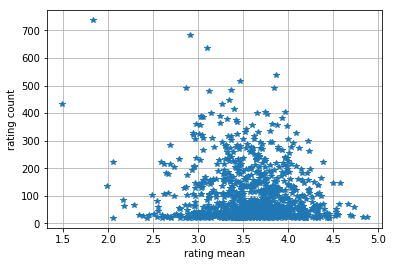

In [31]:
plt.plot( user_info.rating_mean, user_info.rating_counts,'*')
plt.grid()
plt.xlabel("rating mean")
plt.ylabel('rating count')

We can see that if the user has to many ratins, the mean value tends to be around 3.5. On the other side, if the mean rating is high or low, the rating count is low. There are, however, some users that have a strange behaviour, since they have too many ratings and low rating mean: this can be considered outliers, and could be _taken out of the data_.

Text(0,0.5,'Count')

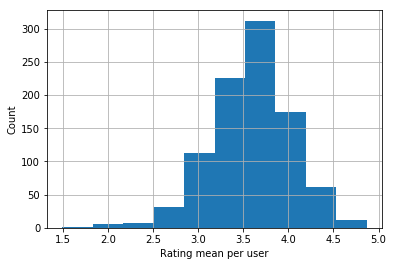

In [32]:
plt.hist(user_info.rating_mean)
plt.grid()
plt.xlabel("Rating mean per user")
plt.ylabel("Count")

As we can see, the mean rating among the users is around 3.5.

Text(0,0.5,'Count')

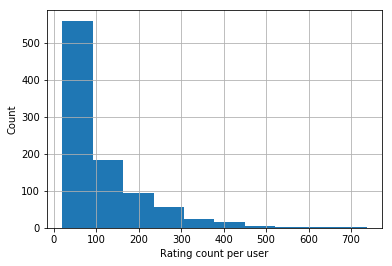

In [33]:
plt.hist(user_info.rating_counts)
plt.grid()
plt.xlabel("Rating count per user")
plt.ylabel("Count")

On the other hand, the rating counts among users decresases exponentially: it is more probable to find users with low rating count, while users with high rating count appears rarely.

Text(0,0.5,'Count')

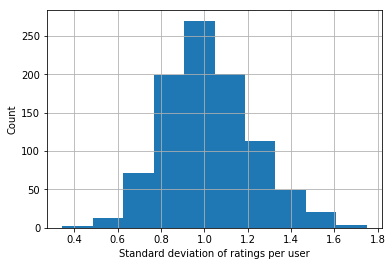

In [34]:
plt.hist(user_info.rating_std)
plt.grid()
plt.xlabel("Standard deviation of ratings per user")
plt.ylabel("Count")

From the above graph, we can also conclude one thing: the mean standard deviation of the ratings is 1. It means that the rating for each user does not deviates too much from the mean rating the user has. It could therefore indicates that the mean rating ro each user could be a good predictor for future ratings.

Text(0,0.5,'rating mean')

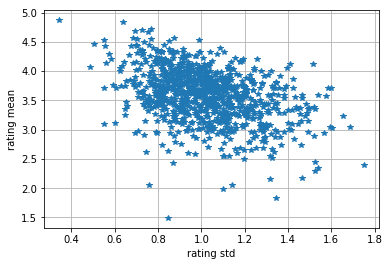

In [35]:
plt.plot(user_info.rating_std, user_info.rating_mean, '*')
plt.grid()
plt.xlabel('rating std')
plt.ylabel('rating mean')

According to the above graph, there is a little tendence the rating mean to decrease as the standard deviation increases. It shows that the lower the mean ratings are, the more deviated are the rating from the mean. 

To analize better how the mean rating pro user is related with the activity of the user (rating counts), we discretize the mean of rating (using ceil function) and then we calculate the mean of the rating counts. By this method, we find out that the users with a lower discrete mean, have higher rating counts. Of course, one of the causes could be some outliers (some users with many ratings and low mean rating as showed before).

In [36]:
user_info['discrete_mean'] = np.ceil(user_info.rating_mean)
user_info[['discrete_mean', 'rating_counts']].groupby(['discrete_mean']).mean()

,rating_counts
discrete_mean,
2.0,435.666667
3.0,101.306818
4.0,110.745739
5.0,79.210884


Now we import user related information and see how it relates to ratings.

In [37]:
users.index = users.user_id
users_augmented = users.join(user_info)
users_augmented.head()

,user_id,age,sex,occupation,zip_code,rating_counts,rating_mean,rating_std,discrete_mean
user_id,,,,,,,,,
1,1,24,M,technician,85711,NaN,NaN,NaN,NaN
2,2,53,F,other,94043,272.0,3.610294,1.263585,4.0
3,3,23,M,writer,32067,62.0,3.709677,1.030472,4.0
4,4,24,M,technician,43537,54.0,2.796296,1.219026,3.0
5,5,33,F,other,15213,24.0,4.333333,0.916831,5.0


In [38]:
users_augmented.groupby(['sex'])['rating_mean'].mean()

sex
F    3.630362
M    3.571248
Name: rating_mean, dtype: float64

In [39]:
cr1 = pd.crosstab(users_augmented.discrete_mean, users_augmented.sex)
cr1 = cr1/np.sum(cr1, 0)
cr1

sex,F,M
discrete_mean,,
2.0,0.000000,0.004484
3.0,0.076923,0.100149
4.0,0.754579,0.744395
5.0,0.168498,0.150972


According to the above results, the mean rating among men and women does not differ alot. However, given that someone is woman, could increase a littl the probabilidty that the rating is above 4, where as the probability that the socre is between 3 and 4 could be higher if the person is man. 

Text(0,0.5,'mean rating')

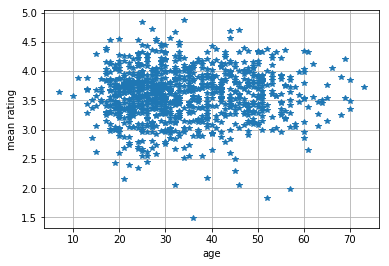

In [40]:
plt.plot(users_augmented.age, users_augmented.rating_mean, '*')
plt.grid()
plt.xlabel("age")
plt.ylabel("mean rating")

The age may have also an impact predicting the rating. We can see, for example, if the people are older, the possibility that they give a rating lower than 3 is lower.

In [41]:
cr2 = pd.crosstab(users_augmented.discrete_mean, users_augmented.occupation)
cr2 = cr2/np.sum(cr2, 0)
cr2

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
discrete_mean,,,,,,,,,,,,,,,,,,,,,
2.0,0.000000,0.000000,0.000000,0.021053,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.101266,0.107143,0.000000,0.094737,0.164179,0.055556,0.09375,0.00,0.000000,0.083333,...,0.076923,0.333333,0.057143,0.060606,0.000000,0.000000,0.193548,0.102041,0.076923,0.133333
4.0,0.759494,0.821429,0.571429,0.726316,0.716418,0.833333,0.71875,0.75,0.714286,0.833333,...,0.653846,0.666667,0.733333,0.742424,0.928571,0.916667,0.741935,0.760204,0.692308,0.688889
5.0,0.139241,0.071429,0.428571,0.157895,0.119403,0.111111,0.18750,0.25,0.285714,0.083333,...,0.269231,0.000000,0.209524,0.181818,0.071429,0.083333,0.064516,0.137755,0.230769,0.177778


In the last table, we can see that the occupation can, in fact, be somewhat important to predict the rating. In fact, the probability that the discrete mean rating falls in a given interval varies a lot depending on the occupation.

Now, movies data is used to get some insights from them.

In [42]:
movies_rating_info = counts_movies.join(avg_rating_movie).join(std_rating_movie, rsuffix='2')
movies_rating_info.head()

,rating_count,avg_rating,std_rating
title,,,
'Til There Was You (1997),8,3.000000,0.925820
1-900 (1994),1,1.000000,NaN
101 Dalmatians (1996),44,3.704545,1.069222
12 Angry Men (1957),137,3.861314,0.908963
187 (1997),45,3.333333,1.000000


Text(0,0.5,'rating count')

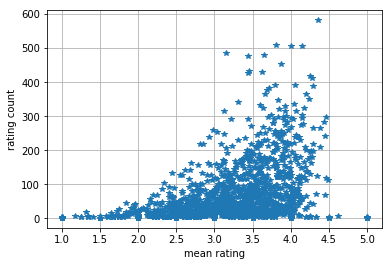

In [43]:
plt.plot(movies_rating_info.avg_rating, movies_rating_info.rating_count, '*')
plt.grid()
plt.xlabel('mean rating')
plt.ylabel('rating count')

In the last picture, we confirm something that can be obvious: the most a movie is seen, the higher is its mean rating. If a movie is seen a lot, in fact, it could indicates that it is a good movie and therefore, the rating could be higher than normal.

After permoring the previous analyzis, we conclude generally the following:

- There are some users that have many rating with low ratings. These could be considered outlier since their behavior does not match the other users behavior. Therefore, these users are extracted from the dataset. We eliminiate user 406 (since he/she has many ratings and a low rating mean) and user 182 (since his/her mean rating is too low).
- The mean rating of the movie, the mean rating of the user, the popularity of the movie, the activity, the age and occupation of the user could be very potential predictors for the rating. A predictor of the rating which uses these features could be trained to face the cold start problem, however _this predictive algorithm will not be coded in this notebook and remains as a proposal for improvement._

### Exercise 2: Implementation of a basic matrix factorization (MF) technique for recommender systems



We create a recommender system for the MovieLens dataset using matrix factorization. With matrix factorizations, we start from a user-item matrix ($R$) and find two matrices $Q$ and $P$. This concept can be summarized in the following equation and the following image [2].

$R = PQ^T$

<img src="Factorization1.png">

The matrix $R$ contains the rating given by a user $U$ to an Item $I$. All ratings of a given user are placed in a given row. On the other hand, all ratings of a given item are placed in a given column. Therefore, the element $R_{ij}$ of the matrix $R$ is the rating of the user i to the item j. The matrix $R \space \in \space R^{n\times m}$, while the matrices $P \space \in \space R^{n \times k}$  and $Q \space \in \space R^{m \times k}$ have a new common dimension $K$, which corresponds to latent features. 

The implemented algorithm for the matrix factorization is the alternating least squares [3] which is essentially applying stochastic gradient ascent (SGD) algorithm. More information about this algorithm can be found in different sources [4][5].

To find the est hyperaparameters we apply K-Fold cross validation. We also create a test set for the final evaluation.

In [45]:
def split_train_test(data, train_pct, features, target):
    
    '''This functions divides "data"  in train and test set.
    The percentage give to the train data is determined by "train_pct".
    The "features" argument determine a list of features to consider.
    The "target" arugment indicates the the variable to predict.'''
    
    #getting the total number of training samples
    data_size = data.shape[0]
    train_size = int(train_pct*data_size)

    #shuffling indexes to separate train and test randoming
    idx = np.arange(0,data_size)
    np.random.shuffle(idx)

    #creating test indexes
    train_idx = idx[:train_size]

    #creating test indexes
    test_idx = idx[train_size:]

    #selecting train data (features)
    X_train = data[features].iloc[train_idx,]

    #selecting test data (features)
    X_test = data[features].iloc[test_idx,]
    
    return np.array(X_train), np.array(X_test)

#filtering outlier users
ratings = ratings[ratings.user_id !=406][ratings.user_id!=182]

features = ['user_id', 'movie_id', 'rating'] #list of features
target = []
X_train, X_test= split_train_test(ratings, 0.8, features, target)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 79704
Test set size: 19926


In [53]:
def threshold(x):
    
    '''This function truncate the value of x, so that 
    it falls inside the valid range of the ratings.'''
    
    if(x>5): x=5
    elif(x<1): x=1
    
    return x

def RMSE(X,p,q):
    
    '''Returns RMSE of the factorized matrix.
    Inputs are:
    - X: matrix with three columns (above exlained format)
    - p: first factor matrix
    - q: second factor matrix'''
    
    e = 0
    n = X.shape[0]
    for u, i, r in zip(X[:,0], X[:,1], X[:,2]):
        e = e + (r - np.dot(p[u,:],q[i,:].T))**2

    rmse = np.sqrt(e/n)
    
    return rmse

def RMSE_thr(X,p,q):
    
    '''Returns RMSE of the factorized matrix. This function threshold 
       the predicted values to valid values (within the valid range)
       to measure the RMSE.
    Inputs are:
    - X: matrix with three columns (above exlained format)
    - p: first factor matrix
    - q: second factor matrix'''
    
    e = 0
    n = X.shape[0]
    for u, i, r in zip(X[:,0], X[:,1], X[:,2]):
        e = e + (r - threshold(np.dot(p[u,:],q[i,:].T)))**2

    rmse = np.sqrt(e/n)
    
    return rmse
    

def SGA_MF(X_train, X_test, K, n_p, n_q, alpha, lamb, max_iter=10):
    
    '''Factorizes a matrix given training data (X_train) and measure RMSE 
    on test set (X_test). Other hyperparameters must be given:
    - n_p: number of total users (number of rows for the p matrix)
    - n_q: number of total items (numer of items for the q matrix)
    - K: number of latent features
    - alpha: learning rate
    - lamb: regularization factor'''

    #initializing values
    p = np.random.random((n_p,K))
    q = np.random.random((n_q,K))

    rmse_train_list = []
    rmse_test_list = []

    error = RMSE(X_test, p,q)
    print("Initial RMSE:",error)
    
    last_rmse = error

    for j in range(max_iter):

        np.random.shuffle(X_train)

        for u, i, r in zip(X_train[:,0], X_train[:,1], X_train[:,2]):
            #error
            e = r - np.dot(p[u,:],q[i,:].T)

            #updating parameters
            for k in range(K):
                p[u,k] = p[u,k] + alpha*(e*q[i,k] - lamb*p[u,k])
                q[i,k] = q[i,k] + alpha*(e*p[u,k] - lamb*q[i,k])

        #measuring rmse 
        rmse_train = RMSE(X_train, p,q)
        rmse_test = RMSE(X_test, p, q)

        rmse_train_list.append(rmse_train)
        rmse_test_list.append(rmse_test)

        if (j%10)==0:
            print("Epoch: "+str(j))
            print("RMSE test:", rmse_test)
            
        if(np.abs(rmse_train-last_rmse)<0.001):
            break
        
        last_rmse = rmse_train
            
    fix, ax = plt.subplots(figsize=(5,5))
    
    ax.plot(rmse_test_list, "b")
    ax.plot(rmse_train_list, "r")
    ax.legend(("test", "train"))
    ax.set_title("RMSE vs. Iteration lambda="+str(lamb)+" alpha="+ str(alpha)+ " k=" + str(k))
    
    return rmse_train, rmse_test, p, q

Now we use the above defined functions to factorize the matrix of ratings.

Trying hyperparameters set: k= 5 alpha= 0.01 lambda= 0.1
Initial RMSE: 2.58439235998
Epoch: 0
RMSE test: 1.11802885213
Initial RMSE: 2.55457807063
Epoch: 0
RMSE test: 1.10890083776
Initial RMSE: 2.55675881677
Epoch: 0
RMSE test: 1.11134611213
Trying hyperparameters set: k= 5 alpha= 0.01 lambda= 0.01
Initial RMSE: 2.59571367847
Epoch: 0
RMSE test: 1.10351606194
Initial RMSE: 2.60370595591
Epoch: 0
RMSE test: 1.11086292485
Initial RMSE: 2.61398047898
Epoch: 0
RMSE test: 1.09999987964
Trying hyperparameters set: k= 5 alpha= 0.01 lambda= 0.001
Initial RMSE: 2.58708658204
Epoch: 0
RMSE test: 1.10497977088
Initial RMSE: 2.58144013238
Epoch: 0
RMSE test: 1.10084442512
Initial RMSE: 2.56887023203
Epoch: 0
RMSE test: 1.10376882527
Trying hyperparameters set: k= 5 alpha= 0.001 lambda= 0.1
Initial RMSE: 2.62220326022
Epoch: 0
RMSE test: 2.15621278969
Initial RMSE: 2.59247221073
Epoch: 0
RMSE test: 2.13072886842
Initial RMSE: 2.59362870921
Epoch: 0
RMSE test: 2.12286244026
Trying hyperparameters s

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Trying hyperparameters set: k= 5 alpha= 0.0001 lambda= 0.01
Initial RMSE: 2.59179241885
Epoch: 0
RMSE test: 2.54192774448
Initial RMSE: 2.6003470739
Epoch: 0
RMSE test: 2.54985773821
Initial RMSE: 2.59842690473
Epoch: 0
RMSE test: 2.54853827413
Trying hyperparameters set: k= 5 alpha= 0.0001 lambda= 0.001
Initial RMSE: 2.56963829377
Epoch: 0
RMSE test: 2.51901920962
Initial RMSE: 2.60858966732
Epoch: 0
RMSE test: 2.55741678621
Initial RMSE: 2.56889893617
Epoch: 0
RMSE test: 2.51884778689
Trying hyperparameters set: k= 10 alpha= 0.01 lambda= 0.1
Initial RMSE: 1.67530133394
Epoch: 0
RMSE test: 1.03493324685
Initial RMSE: 1.68435593554
Epoch: 0
RMSE test: 1.0305674549
Initial RMSE: 1.65738370335
Epoch: 0
RMSE test: 1.02320068796
Trying hyperparameters set: k= 10 alpha= 0.01 lambda= 0.01
Initial RMSE: 1.66353754578
Epoch: 0
RMSE test: 1.033047882
Initial RMSE: 1.69760302812
Epoch: 0
RMSE test: 1.02790513972
Initial RMSE: 1.69914655759
Epoch: 0
RMSE test: 1.02446661563
Trying hyperparameters

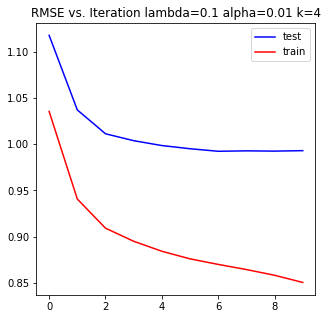

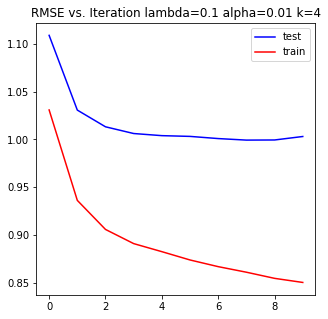

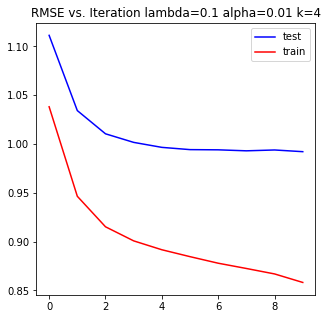

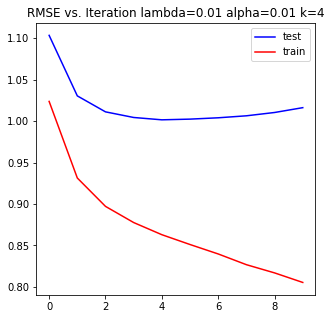

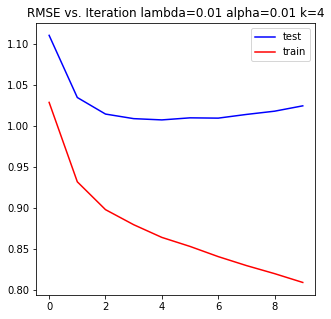

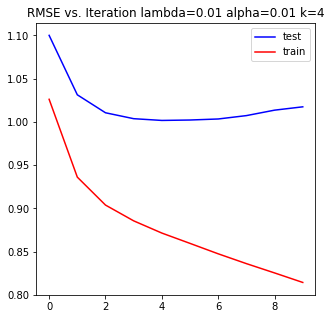

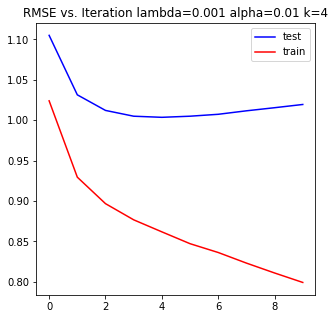

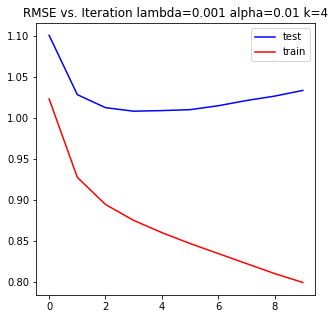

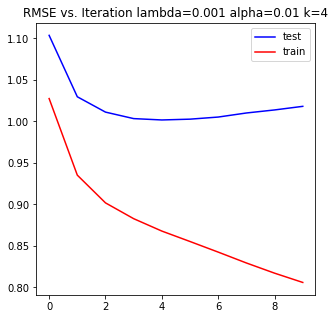

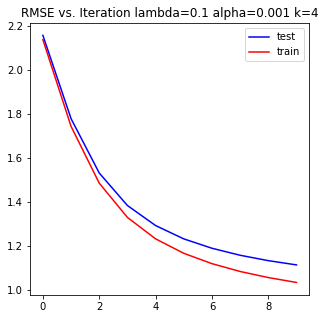

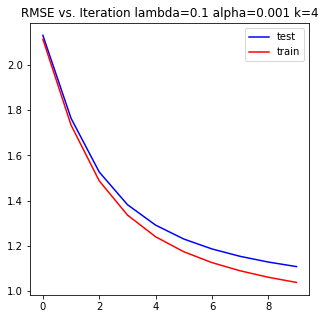

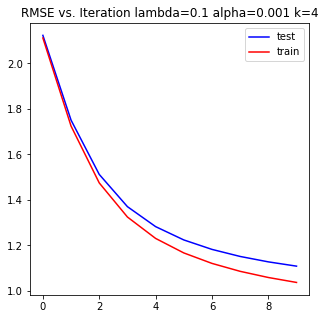

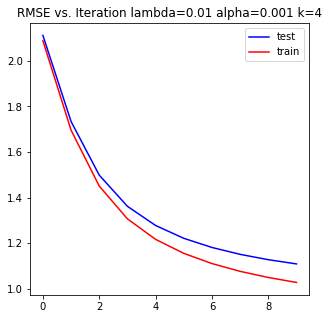

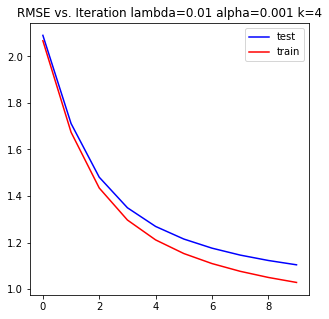

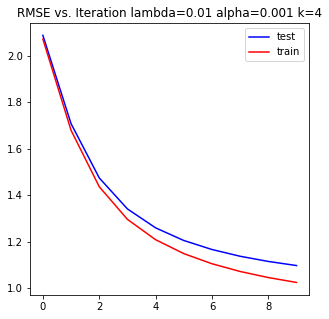

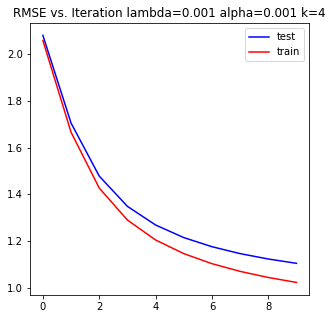

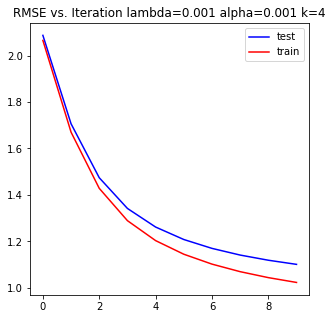

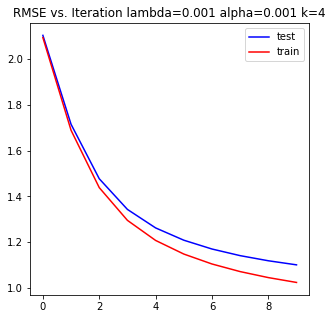

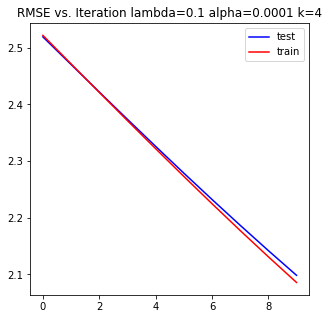

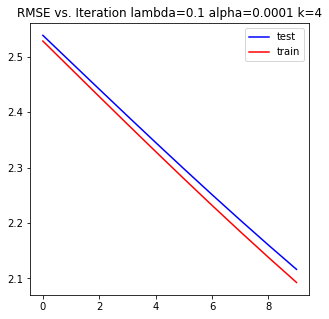

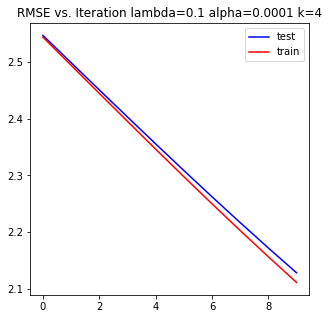

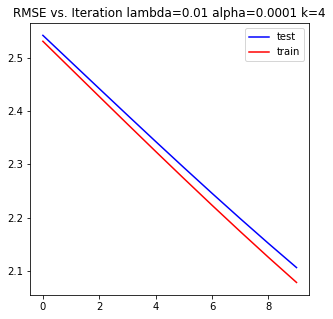

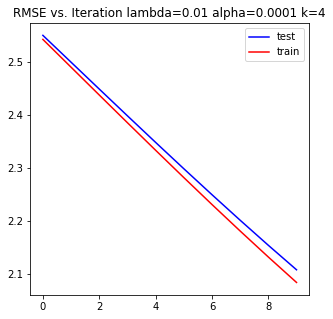

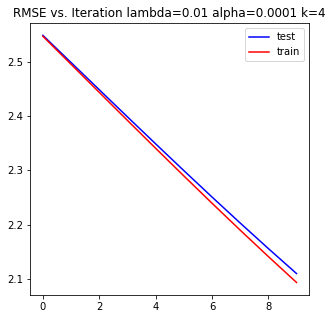

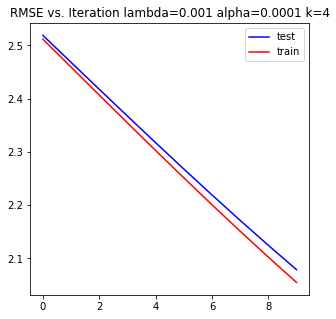

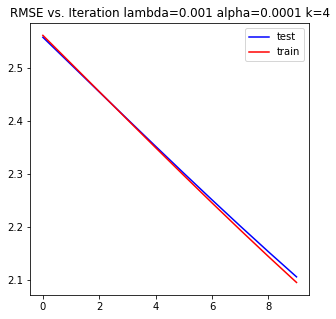

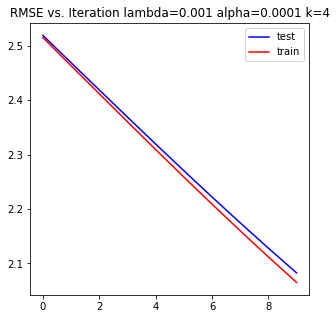

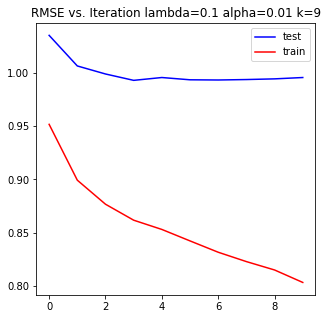

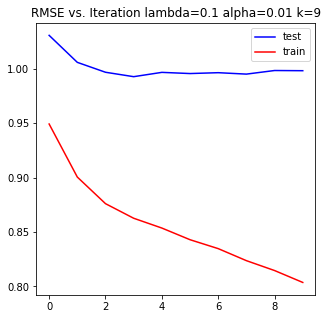

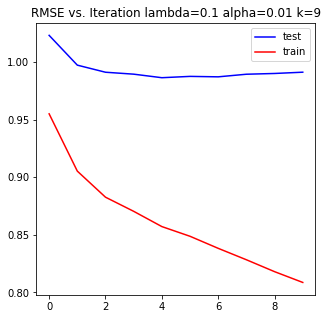

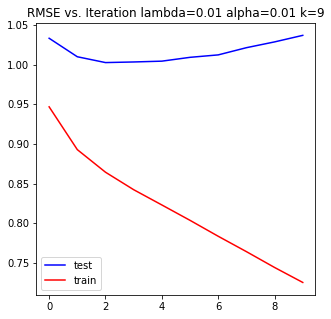

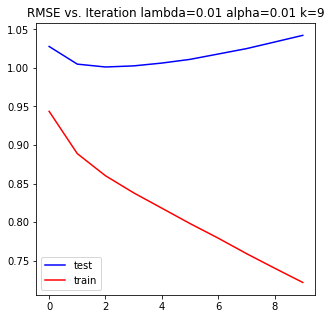

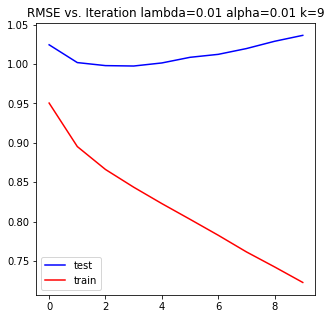

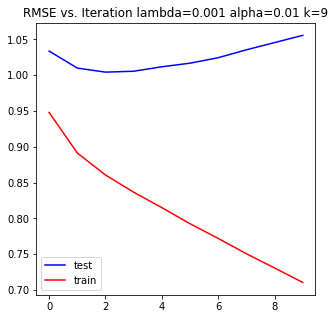

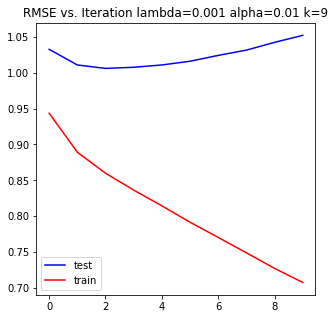

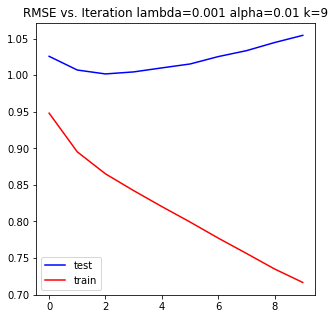

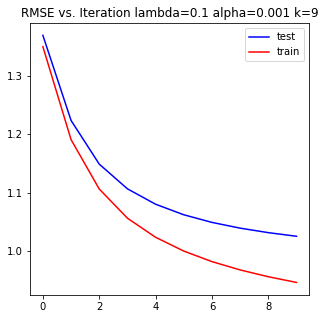

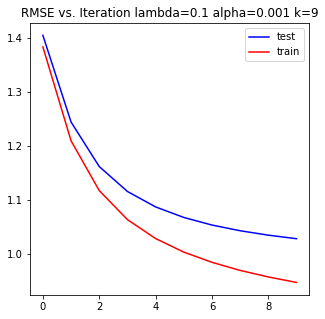

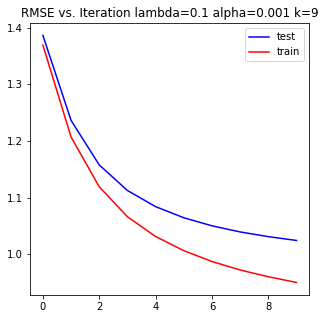

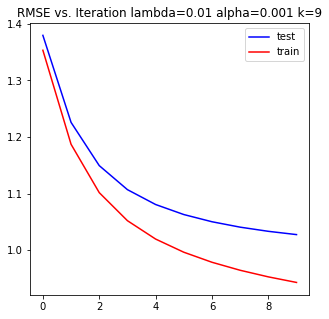

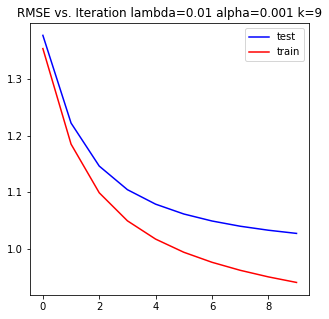

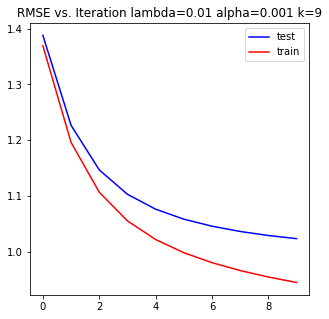

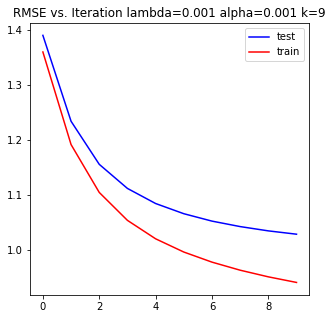

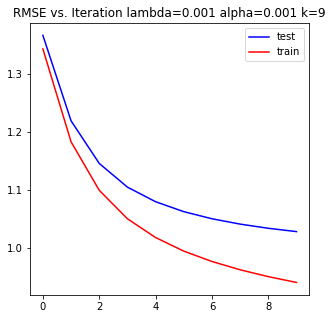

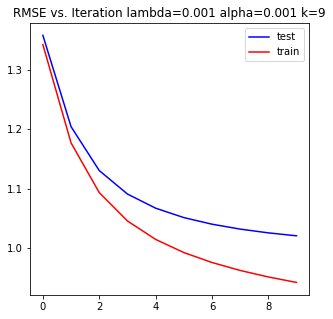

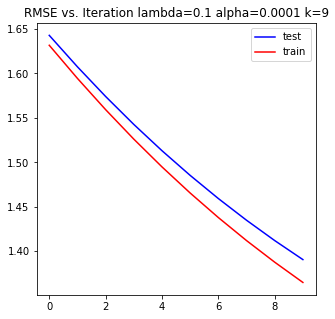

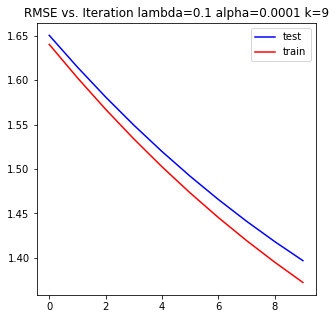

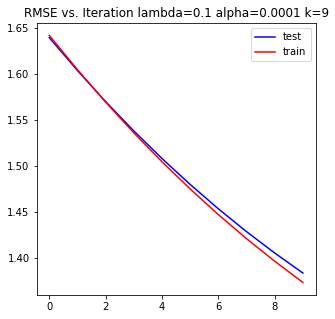

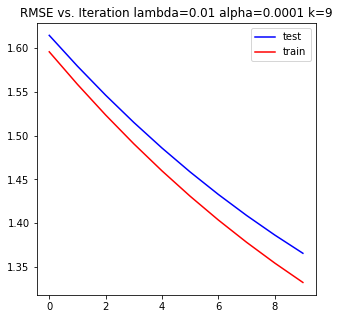

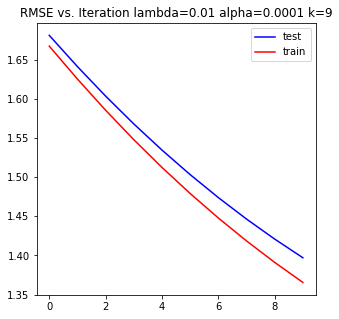

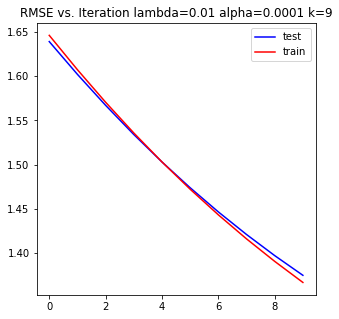

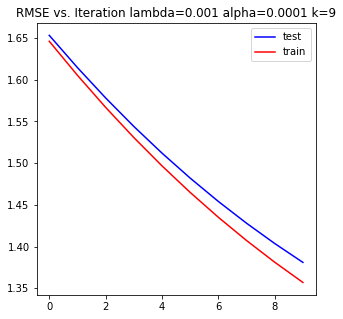

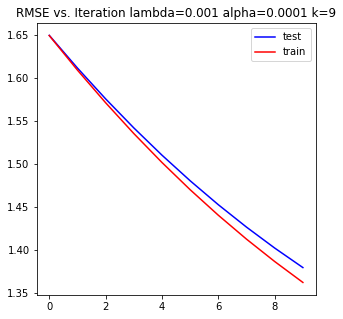

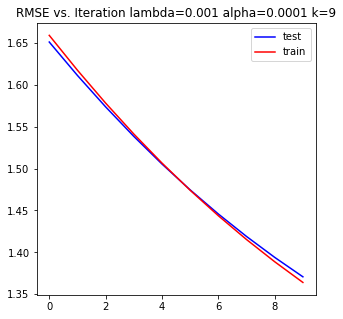

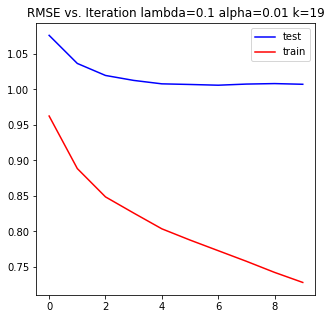

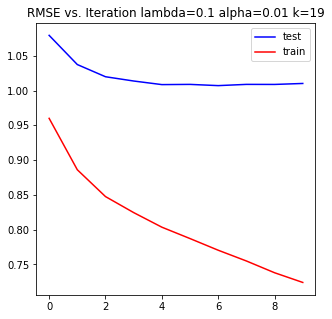

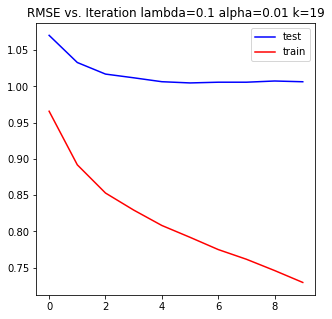

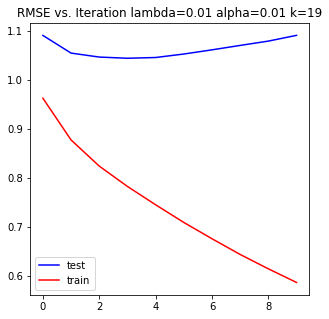

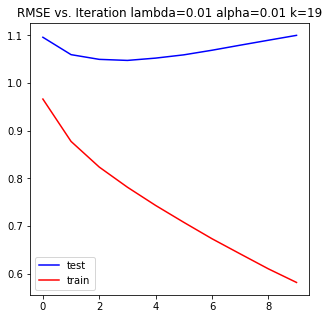

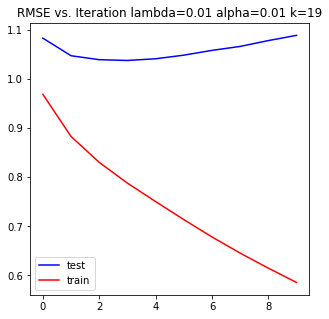

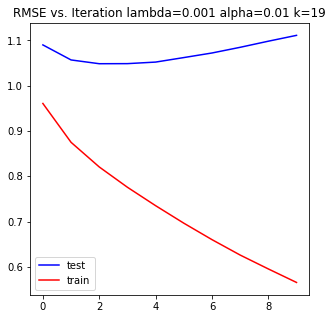

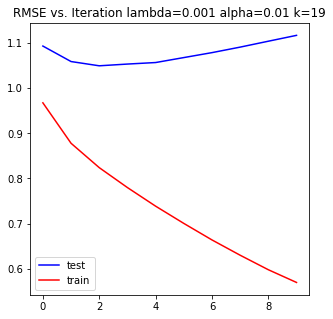

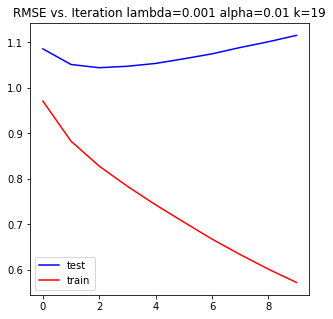

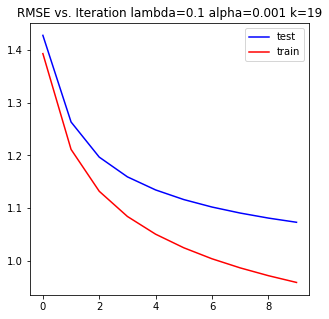

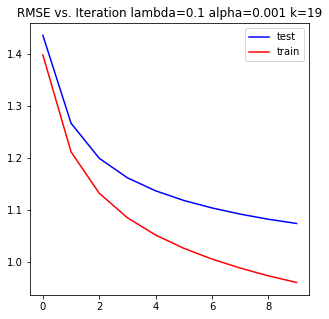

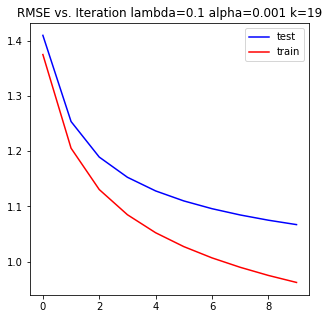

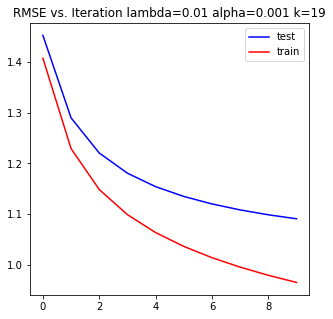

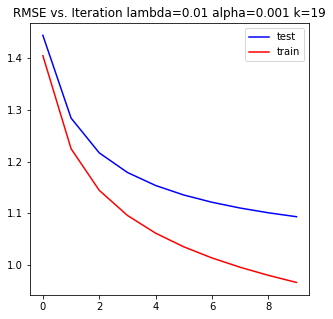

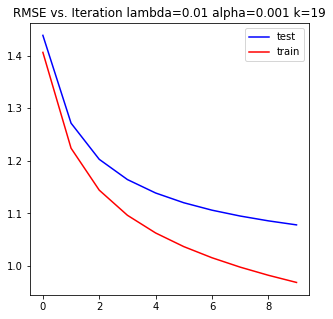

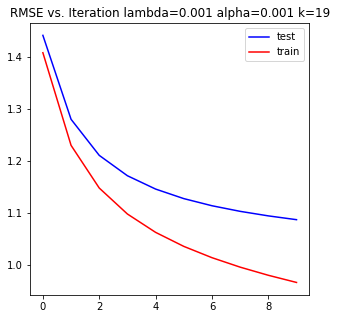

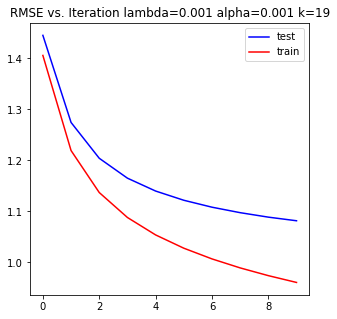

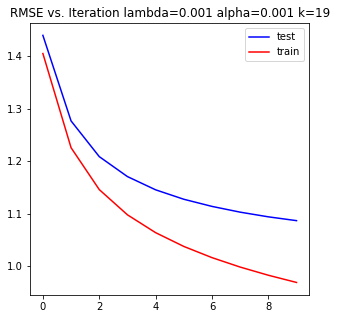

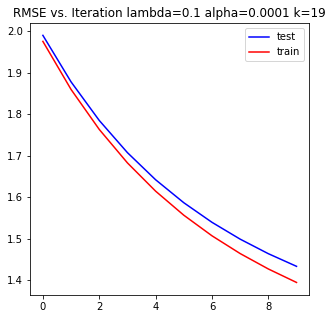

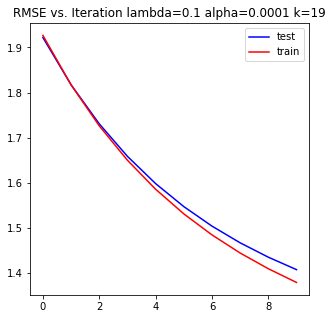

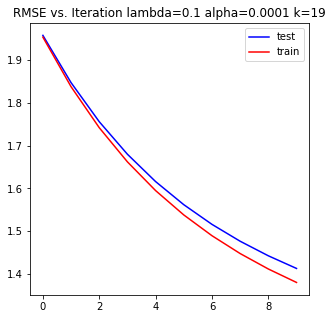

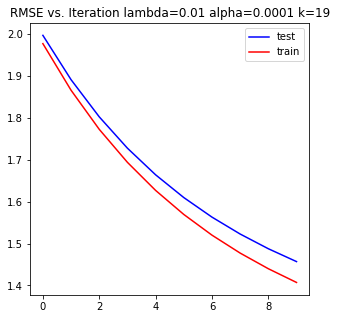

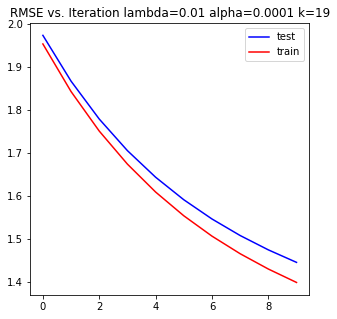

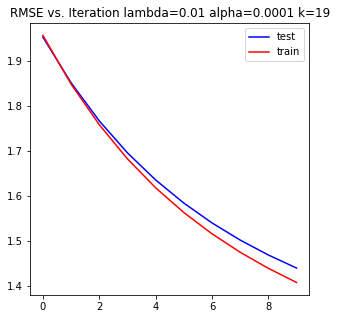

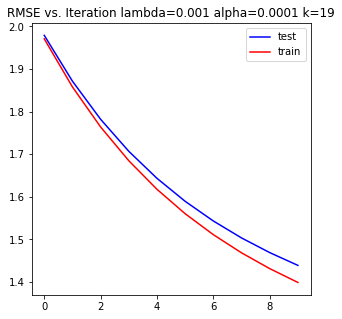

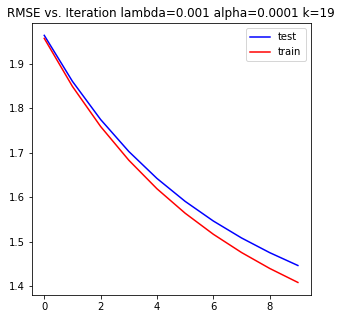

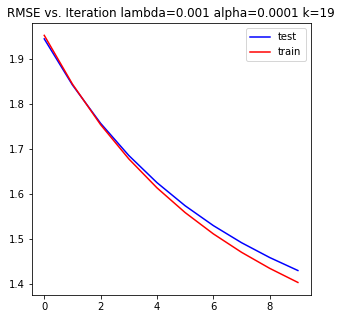

In [56]:
n_q = max(ratings["movie_id"])+1
n_p = max(ratings["user_id"])+1

#number of samples of training set
n_train = X_train.shape[0]

#number of folds
n_folds = 3

#initializing folds
folds = []
samples_fold = int(n_train/n_folds)

#creating the k-fold subsets
for i in range(n_folds):
    folds.append((X_train[(i*samples_fold):((i+1)*samples_fold),:]))

folds_list = list(range(n_folds+1))

#initialize list to store the man of each hyperparameter setting
mean_val_folds = []

#list of hyperparameters
max_iter= 10
k_list = [5,10,20]
alpha_list = [0.01, 0.001, 0.0001]
lamb_list = [0.1, 0.01, 0.001]

hyper_list = [(i,j,k) for i in k_list for j in alpha_list for k in lamb_list]

for k,alpha,lamb in hyper_list:
    
    print("Trying hyperparameters set: k=",k,"alpha=", alpha, "lambda=",lamb)

    val_rmse_folds = []
    
    for f in range(n_folds):

            #list of folds
            folds_list = list(range(n_folds))
            folds_list.pop(f)

            #selecting test dataset
            X_val_fold = folds[f]

            #merging the folds to create the training dataset
            X_train_fold = folds[folds_list[1]]   
            
            for j in folds_list[1:]:
                X_train_fold = np.vstack((X_train_fold, folds[j]))

            #training the model
            rmse_train, rmse_val, p, q = SGA_MF(X_train_fold, X_val_fold, k, n_p, n_q, alpha, lamb, max_iter=max_iter)
            
            #finding accuracy over the fold
            val_rmse_folds.append(rmse_val)
            
    #findning the mean across all the folds
    mean_val_folds.append(np.mean(val_rmse_folds))

In [57]:
pd.DataFrame({'Hyperparameter': hyper_list,
              'RMSE in test':mean_val_folds})

,Hyperparameter,RMSE in test
0,"(5, 0.01, 0.1)",0.996116
1,"(5, 0.01, 0.01)",1.019427
2,"(5, 0.01, 0.001)",1.023773
3,"(5, 0.001, 0.1)",1.110568
4,"(5, 0.001, 0.01)",1.103436
5,"(5, 0.001, 0.001)",1.102232
6,"(5, 0.0001, 0.1)",2.114188
7,"(5, 0.0001, 0.01)",2.107812
8,"(5, 0.0001, 0.001)",2.089272
9,"(10, 0.01, 0.1)",0.994921


We now train the model with the best hyperparrameter set (k=10, alpha=0.01, lambda=0.1) using the whole train dataset and evaluate the model on the test set.

Initial RMSE: 1.69325668312
Epoch: 0
RMSE test: 0.989834546594
Epoch: 10
RMSE test: 0.952370912452
Epoch: 20
RMSE test: 0.935617488618
Epoch: 30
RMSE test: 0.925662935787


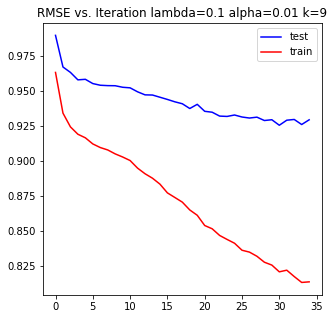

In [59]:
#defining the best hyperparameter set
k = 10
alpha = 0.01
lamb = 0.1

#training the final model with the best hyperparameter set
rmse_train, rmse_val, p, q = SGA_MF(X_train, X_test, k, n_p, n_q, alpha, lamb, max_iter=100)

In [63]:
print("RMSE train error:", rmse_train)
print("RMSE test error:", rmse_val)

RMSE train error: 0.813868001303
RMSE test error: 0.929541089533


The algorithm converges in about 35 iterations and we obtain an RMSE on test data set equals to 0.929. 

### Exercise 3: Recommender systems using matrix factorization of scikit-learn

For this part, we would like to compare the previous results with the results of a given library. In this case, we select scikit learn for two reasons:

- Scikit-learn is a very well and wide used library.
- There are some extra dependencies for the "libmf" that could not be addressed. 

The scikit -learn library has a module called "decomposition" which has an object called NMF. This object factorizes a matriz in two non-ngative matriz (all components are positive). This, of courses, imposes an aditional constraint in comparision to the previous implemented matriz factorization. The previous implemented matriz factorization, therefore, permits to have negative values.

The object NMF in scikit-learn factorizes a matrix R in the following way:

$R=PQ^T$

Where P and Q are positive. To obtain P matrix, we should apply the method transform on the factorized matrix. To obtain Q, we have to use the variable _components_ of the NMF object.


In [269]:
from scipy.sparse import *
from scipy import *
#compressed sparse row matrix

row = X_train[:,0]
col = X_train[:,1]
data = X_train[:,2]

X_tr_dense = np.array(csr_matrix((data, (row, col)), shape= (n_p, n_q)).todense())
print("Shape of new matrix:", X_tr_dense.shape)

Shape of new matrix: (944, 1683)


In [324]:

from sklearn.decomposition import NMF

model = NMF(n_components=250,init='nndsvd', random_state=10, alpha=0.01, max_iter=200)
P = model.fit_transform(X_tr_dense.astype(float))
Q_t = model.components_

print("Shape of P:", P.shape)
print("Shape of Q:", Q_t.shape)

RMSE_thr(X_train, P,Q_t.transpose())

X_=model.inverse_transform(P)

Shape of P: (944, 250)
Shape of Q: (250, 1683)


In [326]:
RMSE_thr(X_train, P,Q_t.transpose())

1.4217762680456019

In [337]:
n_q = max(ratings["movie_id"])+1
n_p = max(ratings["user_id"])+1

#number of samples of training set
n_train = X_train.shape[0]

#number of folds
n_folds = 3

#initializing folds
folds = []
samples_fold = int(n_train/n_folds)

#creating the k-fold subsets
for i in range(n_folds):
    folds.append((X_train[(i*samples_fold):((i+1)*samples_fold),:]))

folds_list = list(range(n_folds+1))

#initialize list to store the man of each hyperparameter setting
mean_test_folds = []

#list of hyperparameters
max_iter= 1000
k_list = [5,10,20]
lamb_list = [0.1, 0.01, 0.001]

hyper_list = [(i,j) for i in k_list for j in lamb_list]

for k, lamb in hyper_list:

    print("Trying hyperparameters set: k=",k,"lambda=",lamb)
    test_rmse_folds = []
    
    for f in range(n_folds):

            #list of folds
            folds_list = list(range(n_folds))
            folds_list.pop(f)

            #selecting test dataset
            X_test_fold = folds[f]

            #merging the folds to create the training dataset
            X_train_fold = folds[folds_list[1]]   
            
            for j in folds_list[1:]:
                X_train_fold = np.vstack((X_train_fold, folds[j]))

            #training the model
            row = X_train_fold[:,0]
            col = X_train_fold[:,1]
            data = X_train_fold[:,2]
    
            X_tr_dense = np.array(csr_matrix((data, (row, col)), shape= (n_p, n_q)).todense())
      
            model = NMF(n_components=k,init='random', random_state=10, alpha=lamb, max_iter=max_iter)
            P = model.fit_transform(X_tr_dense)
            Q_t = model.components_
            
            print(P.shape)

            #validating model
            row = X_test_fold[:,0]
            col = X_test_fold[:,1]
            data = X_test_fold[:,2]
            
            X_test_dense = np.array(csr_matrix((data, (row, col)), shape= (n_p, n_q)).todense())
            
            rmse_test = RMSE(X_test_fold, P,Q_t.transpose())
            
            print("RMSE in test:", rmse_test)

            #finding accuracy over the fold
            test_rmse_folds.append(rmse_test)
            
    #findning the mean across all the folds
    mean_test_folds.append(np.mean(test_rmse_folds))

Trying hyperparameters set: k= 5 lambda= 0.1
(944, 5)
RMSE in test: 3.06771959264
(944, 5)
RMSE in test: 3.07199447009
(944, 5)
RMSE in test: 3.07604976549
Trying hyperparameters set: k= 5 lambda= 0.01
(944, 5)
RMSE in test: 3.06755084179
(944, 5)
RMSE in test: 3.07183272794
(944, 5)
RMSE in test: 3.07590103056
Trying hyperparameters set: k= 5 lambda= 0.001
(944, 5)
RMSE in test: 3.06751418195
(944, 5)
RMSE in test: 3.07180630095
(944, 5)
RMSE in test: 3.07589423779
Trying hyperparameters set: k= 10 lambda= 0.1
(944, 10)
RMSE in test: 3.07497547446
(944, 10)
RMSE in test: 3.07750179996
(944, 10)
RMSE in test: 3.07966267986
Trying hyperparameters set: k= 10 lambda= 0.01
(944, 10)
RMSE in test: 3.07484346262
(944, 10)
RMSE in test: 3.07736686937
(944, 10)
RMSE in test: 3.07953434471
Trying hyperparameters set: k= 10 lambda= 0.001
(944, 10)
RMSE in test: 3.07458231392
(944, 10)
RMSE in test: 3.07719181789
(944, 10)
RMSE in test: 3.07954164209
Trying hyperparameters set: k= 20 lambda= 0.1


In [338]:
pd.DataFrame({'Hyperparameter': hyper_list,
              'RMSE in test':mean_test_folds})

,Hyperparameter,RMSE in test
0,"(5, 0.1)",3.071921
1,"(5, 0.01)",3.071762
2,"(5, 0.001)",3.071738
3,"(10, 0.1)",3.077380
4,"(10, 0.01)",3.077248
5,"(10, 0.001)",3.077105
6,"(20, 0.1)",3.119382
7,"(20, 0.01)",3.119261
8,"(20, 0.001)",3.118820


In [343]:
row = X_train[:,0]
col = X_train[:,1]
data = X_train[:,2]
    
X_tr_dense = np.array(csr_matrix((data, (row, col)), shape= (n_p, n_q)).todense())
      
model = NMF(n_components=5,init='random', random_state=10, alpha=0.001, max_iter=max_iter)
P = model.fit_transform(X_tr_dense)
Q_t = model.components_

#validating model
row = X_test[:,0]
col = X_test[:,1]
data = X_test[:,2]
            
X_test_dense = np.array(csr_matrix((data, (row, col)), shape= (n_p, n_q)).todense())
            
rmse_test = RMSE(X_test, P,Q_t.transpose())
rmse_test_modified = RMSE_thr(X_test, P, Q_t.transpose())
print("RMSE test:", rmse_test)
print("RMSE test modified:", rmse_test_modified)


RMSE test: 2.70768420175
RMSE test modified: 2.4293571516


Once we have chosen the best hyperparameter set using cross-validation, we retrained the model and find that the test error using the threshold to the predictions decreased. However, the RMSE applying the scikit-learn function is still higher than the implemented. The main reason for that is that we use a _non-negative matrix factorization_ method, it means that the matrix the factor matrix are constraint to be positive, which decreases the capacity of the movdel to learn suitable matrices.

## References

[1] Movie Lens data: https://grouplens.org/datasets/movielens/

[2] Source: data-artisans.com 

[3] Alternating least squares: https://datasciencemadesimpler.wordpress.com/tag/alternating-least-squares/

[4] Trevor Hastie, Rahul Mazumder, Jason D. Lee, Reza Zadeh _Matrix Completion and LowRank SVD via Fast Alternating Least Squares_ Statistics Department and ICME, Stanford University, 2014.

[5] Recommender systems (University Hildesheim): https://www.ismll.uni-hildesheim.de/lehre/ba-18w/script/6_recommender-systems.pdf